<a href="https://colab.research.google.com/github/Inkyu-Yang356/deep-learning-practice/blob/main/250514_convolution_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

## 이미지를 인식하는 원리

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys
import numpy as np

(X_train, y_train) , (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


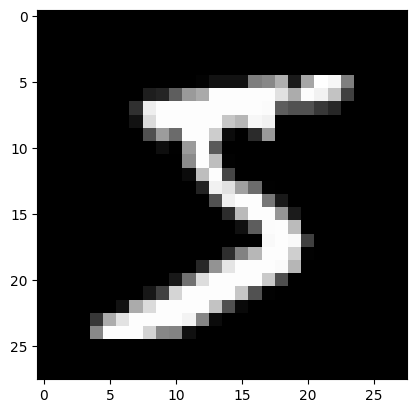

In [2]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [3]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [4]:
# 정렬 예제
variable = 123456789

print("%20s" % variable)  # sort right-side,
print("%-20s" % variable)  # sort left-side, residual remains empty

           123456789
123456789           


In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)  # 각 인덱스 3자리 0-255
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
X_train = X_train.reshape(-1, 784) # 784 = 28*28, 1D Vector화
X_train.shape

(60000, 784)

In [7]:
# [0,1] 정규화
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(-1, 784).astype('float64') / 255

In [8]:
print("class : %d " % (y_train[0]))

#원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])  # 10개의 클래스 인코딩

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 다층 퍼셉트론으로 분류

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import os

# 모델 정의
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))  # Input Layer, Fully Connected Layer
model.add(Dense(10, activation='softmax'))  # Output Layer
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정
modelpath="./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)  #
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)  # 검증셋 손실 기준

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])  # 6000 * 0.25 = 1500

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))  # 평가


Epoch 1: val_loss improved from inf to 0.19101, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.19101 to 0.13694, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13694 to 0.11392, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11392 to 0.10654, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.10654 to 0.09227, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09227 to 0.08890, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss improved from 0.08890 to 0.08265, saving model to ./MNIST_MLP.keras

Epoch 8: val_loss did not improve from 0.08265

Epoch 9: val_loss did not improve from 0.08265

Epoch 10: val_loss did not improve from 0.08265

Epoch 11: val_loss did not improve from 0.08265

Epoch 12: val_loss improved from 0.08265 to 0.08261, saving model to ./MNIST_MLP.keras

Epoch 13: val_loss improved from 0.08261 to 0.08110, saving model to ./MNIST_MLP.keras

Epoch 14: val_loss did n

In [11]:
# 검증 데이터셋과 학습 데이터셋의 오차 각각 저장 후 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [12]:
y_loss

[0.3471483588218689,
 0.14643831551074982,
 0.09813866019248962,
 0.07004870474338531,
 0.05360229313373566,
 0.0411921963095665,
 0.03103436343371868,
 0.023253029212355614,
 0.017865817993879318,
 0.01438614260405302,
 0.011070072650909424,
 0.007980402559041977,
 0.006440795958042145,
 0.005602702032774687,
 0.003699572989717126,
 0.00276543153449893,
 0.002187090227380395,
 0.0017965009901672602,
 0.0015720194205641747,
 0.0013270204653963447,
 0.001057637738995254,
 0.0008518105605617166,
 0.0008161513251252472]

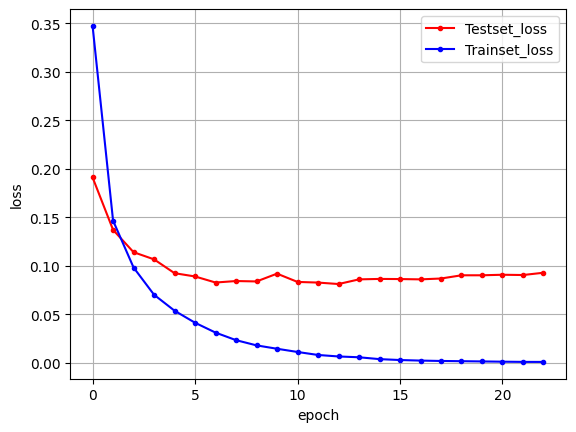

In [13]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 컨볼루션 신경망

확인 문제1 : 출력층의 활성화 함수에 들어갈 빈칸을 채우고 이유를 설명하세요

- 이유 : softmax, 0~9 숫자 다중분류로 확률을 계산해야하기 때문입니다.

확인 문제 2 : 풀링 크기를 (3,3)에서 더 크게 변경하면 모델에 어떤 영향을 미칠지 적어보세요

- 정답 : 전달되는 데이터의 손실이 커지고 디테일이 떨어집니다.

In [15]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255  # 정규화
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255  # 정규화
y_train = to_categorical(y_train)  # 인코딩
y_test = to_categorical(y_test)  # 인코딩

# 컨볼루션 신경망 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))  # 28x28 Pixels Input
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))  # 25% Drop
model.add(Flatten())  # 1차원화
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))  # 50% Drop
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
modelpath="./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)  # 최적화된 모델 저장
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)  # 검증셋 손실 기준

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])
# 6000 / 200 = 30번 업데이트


# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

In [ ]:
# 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 3 : 다층 퍼셉트론과 컨볼루션 신경망의 결과를 비교해보세요
- 다층 퍼셉트론과 달리 합성곱 신경망은 지역적 특징, 패턴을 추출합니다.
- 다층 퍼셉트론은 과적합의 가능성이 높다.